In this module, I used tiingo library to get the Apple closing price data from **May 12, 2016-May 10 2021**. Tiingo is a financial data platform that makes high quality financial tools available to all. 

Tiingo has a REST and Real-Time Data API, which this library helps you to access. 

Then, I used LSTM model to train and predict first on both train and test dataset. \
Next, I used LSTM model to predict closing price for the 30 days 


In [1]:
# Data Collection
import pandas as pd
import pandas_datareader as pdr

In [2]:
df=pdr.get_data_tiingo('AAPL',api_key='0d7303955d74219a968ced8e21acbaa84ff4fc58') #read dataset

In [3]:
df.head() 

close   high    low   open    volume  \
symbol date                                                              
AAPL   2016-05-12 00:00:00+00:00  90.34  92.78  89.47  92.72  76314690   
       2016-05-13 00:00:00+00:00  90.52  91.67  90.00  90.00  44392765   
       2016-05-16 00:00:00+00:00  93.88  94.39  91.65  92.39  61259756   
       2016-05-17 00:00:00+00:00  93.49  94.70  93.01  94.55  46916939   
       2016-05-18 00:00:00+00:00  94.56  95.21  93.89  94.16  42062391   

                                   adjClose    adjHigh     adjLow    adjOpen  \
symbol date                                                                    
AAPL   2016-05-12 00:00:00+00:00  21.095605  21.665378  20.892448  21.651367   
       2016-05-13 00:00:00+00:00  21.137637  21.406178  21.016210  21.016210   
       2016-05-16 00:00:00+00:00  21.922242  22.041334  21.401507  21.574307   
       2016-05-17 00:00:00+00:00  21.831172  22.113724  21.719086  22.078696   
       2016-05-18 00:00:00+00:00  22.081032  22.232815  21.924578  21.987626   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
AAPL   2016-05-12 00:00:00+00:00  305258760      0.0          1.0  
       2016-05-13 00:00:00+00:00  177571060      0.0          1.0  
       2016-05-16 00:00:00+00:00  245039024      0.0          1.0  
       2016-05-17 00:00:00+00:00  187667756      0.0          1.0  
       2016-05-18 00:00:00+00:00  168249564      0.0          1.0

In [112]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-05-04 00:00:00+00:00,127.85,131.4899,126.700,131.19,137564718,127.634352,131.268112,126.486291,130.968718,137564718,0.00,1.0
1253,AAPL,2021-05-05 00:00:00+00:00,128.10,130.4500,127.970,129.20,84000900,127.883930,130.229966,127.754149,128.982075,84000900,0.00,1.0
1254,AAPL,2021-05-06 00:00:00+00:00,129.74,129.7500,127.130,127.89,78128334,129.521164,129.531147,126.915566,127.674284,78128334,0.00,1.0
1255,AAPL,2021-05-07 00:00:00+00:00,130.21,131.2582,129.475,130.85,78973273,130.210000,131.258200,129.475000,130.850000,78973273,0.22,1.0
1256,AAPL,2021-05-10 00:00:00+00:00,126.85,129.5400,126.810,129.41,88071229,126.850000,129.540000,126.810000,129.410000,88071229,0.00,1.0


In [64]:
df=pd.read_csv('Appl.csv')

In [66]:
df.shape

(1257, 14)

In [67]:
df.tail() 

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-05-04 00:00:00+00:00,127.85,131.4899,126.700,131.19,137564718,127.634352,131.268112,126.486291,130.968718,137564718,0.00,1.0
1253,AAPL,2021-05-05 00:00:00+00:00,128.10,130.4500,127.970,129.20,84000900,127.883930,130.229966,127.754149,128.982075,84000900,0.00,1.0
1254,AAPL,2021-05-06 00:00:00+00:00,129.74,129.7500,127.130,127.89,78128334,129.521164,129.531147,126.915566,127.674284,78128334,0.00,1.0
1255,AAPL,2021-05-07 00:00:00+00:00,130.21,131.2582,129.475,130.85,78973273,130.210000,131.258200,129.475000,130.850000,78973273,0.22,1.0
1256,AAPL,2021-05-10 00:00:00+00:00,126.85,129.5400,126.810,129.41,88071229,126.850000,129.540000,126.810000,129.410000,88071229,0.00,1.0


In [68]:
df1=df.reset_index()['close']  #get the closing price

In [69]:
df1


0        90.34
1        90.52
2        93.88
3        93.49
4        94.56
         ...  
1252    127.85
1253    128.10
1254    129.74
1255    130.21
1256    126.85
Name: close, Length: 1257, dtype: float64

In [70]:
import matplotlib.pyplot as plt

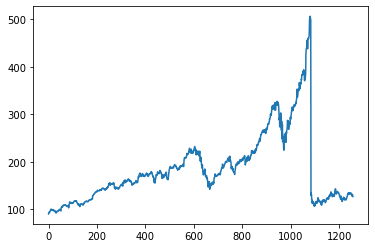

In [71]:
plt.plot(df1)

LSTM are sensitive to the scale of the data

In [72]:
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1 # convert the df1 into array after transforming using minmax scalar

array([[0.000],
       [0.000],
       [0.009],
       ...,
       [0.095],
       [0.096],
       [0.088]])

In [73]:
df1.shape

(1257, 1)

In [74]:
print(df1)

[[0.000]
 [0.000]
 [0.009]
 ...
 [0.095]
 [0.096]
 [0.088]]


In [75]:
len(df1)

1257

In [76]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)}) #print array to 3 decimal places

In [77]:
training_size=int(len(df1)*0.65) #training size 65% of the total dataset
test_size=len(df1)-training_size #testing size 100%-65%
train_data,test_data=df1[0: training_size,:],df1[training_size:len(df1),:1] #assign train and test dataset

In [78]:
def create_dataset(dataset,time_step=1): #create a time step
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)
    

In [79]:
time_step=100
X_train,Y_train=create_dataset(train_data,time_step)
X_test,Y_test=create_dataset(test_data,time_step)

In [80]:
test_data

array([[0.265],
       [0.285],
       [0.270],
       [0.268],
       [0.279],
       [0.289],
       [0.289],
       [0.294],
       [0.294],
       [0.270],
       [0.279],
       [0.274],
       [0.277],
       [0.285],
       [0.285],
       [0.277],
       [0.286],
       [0.296],
       [0.296],
       [0.298],
       [0.304],
       [0.321],
       [0.319],
       [0.309],
       [0.312],
       [0.314],
       [0.319],
       [0.314],
       [0.306],
       [0.309],
       [0.306],
       [0.314],
       [0.312],
       [0.309],
       [0.321],
       [0.323],
       [0.309],
       [0.314],
       [0.329],
       [0.329],
       [0.322],
       [0.329],
       [0.336],
       [0.351],
       [0.350],
       [0.349],
       [0.346],
       [0.349],
       [0.351],
       [0.361],
       [0.360],
       [0.368],
       [0.369],
       [0.376],
       [0.382],
       [0.368],
       [0.368],
       [0.381],
       [0.398],
       [0.402],
       [0.401],
       [0.401],
       [

In [81]:
X_train.shape

(716, 100)

In [82]:
Y_test.shape

(339,)

In [83]:
Y_train.shape

(716,)

In [84]:
#reshape which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [85]:
#Create stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [86]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 173ms/step - loss: 0.0118 - val_loss: 0.0467
Epoch 2/100
12/12 [==============================] - 1s 100ms/step - loss: 0.0028 - val_loss: 0.0277
Epoch 3/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0017 - val_loss: 0.0318
Epoch 4/100
12/12 [==============================] - 1s 88ms/step - loss: 9.1305e-04 - val_loss: 0.0209
Epoch 5/100
12/12 [==============================] - 1s 96ms/step - loss: 4.8170e-04 - val_loss: 0.0201
Epoch 6/100
12/12 [==============================] - 1s 99ms/step - loss: 4.6696e-04 - val_loss: 0.0192
Epoch 7/100
12/12 [==============================] - 1s 114ms/step - loss: 4.1410e-04 - val_loss: 0.0185
Epoch 8/100
12/12 [==============================] - 1s 109ms/step - loss: 3.7797e-04 - val_loss: 0.0181
Epoch 9/100
12/12 [==============================] - 1s 107ms/step - loss: 3.6839e-04 - val_loss: 0.0176
Epoch 10/100
12/12 [==============================] - 1s 96ms/step - lo

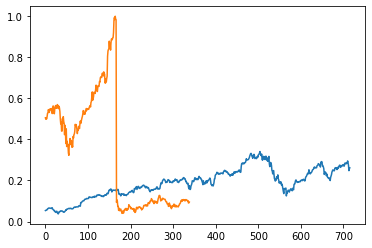

In [123]:
plt.plot([i[-1][0] for i in X_train])
plt.plot([i[-1][0] for i in X_test])

In [89]:
#predict both X_train and X_test
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


In [90]:
# Transform the scalar in the original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [91]:
#RMSE perfomance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

171.63055505471837

In [92]:
math.sqrt(mean_squared_error(Y_test,test_predict))

247.19844596995787

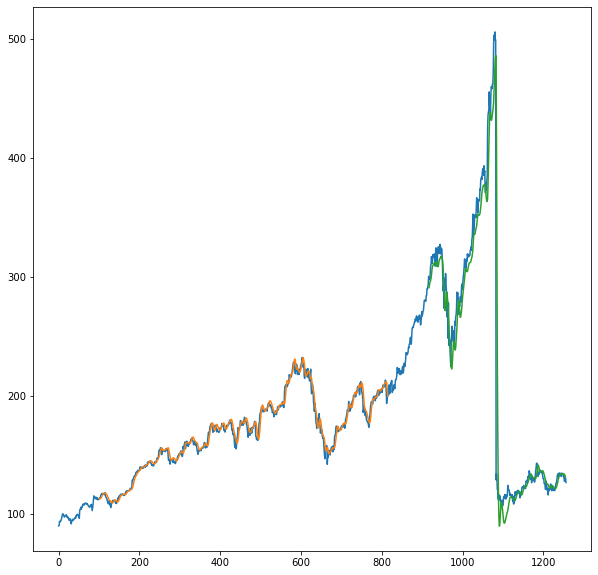

In [93]:
plt.figure(figsize=(10,10))
#plotting
#shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[lo2
#shift test prediction for plotting
test_PredictPlot=np.empty_like(df1)
test_PredictPlot[:,:]=np.nan
test_PredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict

#plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(test_PredictPlot)
plt.show()

In [94]:
X_train

array([[[0.000],
        [0.000],
        [0.009],
        ...,
        [0.053],
        [0.055],
        [0.053]],

       [[0.000],
        [0.009],
        [0.008],
        ...,
        [0.055],
        [0.053],
        [0.055]],

       [[0.009],
        [0.008],
        [0.010],
        ...,
        [0.053],
        [0.055],
        [0.055]],

       ...,

       [[0.225],
        [0.230],
        [0.235],
        ...,
        [0.284],
        [0.273],
        [0.248]],

       [[0.230],
        [0.235],
        [0.231],
        ...,
        [0.273],
        [0.248],
        [0.257]],

       [[0.235],
        [0.231],
        [0.235],
        ...,
        [0.248],
        [0.257],
        [0.261]]])

In [95]:
len(test_data)

440

In [96]:
x_input=test_data[341:].reshape(1,-1)
x_input

array([[0.090, 0.092, 0.087, 0.091, 0.100, 0.098, 0.100, 0.111, 0.107,
        0.104, 0.102, 0.094, 0.098, 0.087, 0.098, 0.100, 0.093, 0.093,
        0.098, 0.093, 0.089, 0.090, 0.100, 0.112, 0.117, 0.126, 0.127,
        0.124, 0.112, 0.100, 0.105, 0.107, 0.105, 0.113, 0.112, 0.112,
        0.110, 0.108, 0.108, 0.108, 0.103, 0.097, 0.095, 0.095, 0.086,
        0.085, 0.084, 0.074, 0.074, 0.090, 0.084, 0.076, 0.072, 0.075,
        0.063, 0.074, 0.071, 0.076, 0.074, 0.081, 0.085, 0.083, 0.073,
        0.071, 0.079, 0.077, 0.072, 0.073, 0.074, 0.075, 0.071, 0.077,
        0.079, 0.086, 0.086, 0.090, 0.096, 0.103, 0.098, 0.106, 0.100,
        0.106, 0.105, 0.107, 0.103, 0.104, 0.100, 0.106, 0.107, 0.106,
        0.104, 0.104, 0.099, 0.102, 0.090, 0.091, 0.095, 0.096, 0.088]])

In [97]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [98]:
from numpy import array

In [99]:
x_input.shape

(1, 99)

In [102]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.092 0.087 0.091 0.100 0.098 0.100 0.111 0.107 0.104 0.102 0.094 0.098
 0.087 0.098 0.100 0.093 0.093 0.098 0.093 0.089 0.090 0.100 0.112 0.117
 0.126 0.127 0.124 0.112 0.100 0.105 0.107 0.105 0.113 0.112 0.112 0.110
 0.108 0.108 0.108 0.103 0.097 0.095 0.095 0.086 0.085 0.084 0.074 0.074
 0.090 0.084 0.076 0.072 0.075 0.063 0.074 0.071 0.076 0.074 0.081 0.085
 0.083 0.073 0.071 0.079 0.077 0.072 0.073 0.074 0.075 0.071 0.077 0.079
 0.086 0.086 0.090 0.096 0.103 0.098 0.106 0.100 0.106 0.105 0.107 0.103
 0.104 0.100 0.106 0.107 0.106 0.104 0.104 0.099 0.102 0.090 0.091 0.095
 0.096 0.088 0.096 0.096]
0 day output [[0.096]]
1 day input [0.087 0.091 0.100 0.098 0.100 0.111 0.107 0.104 0.102 0.094 0.098 0.087
 0.098 0.100 0.093 0.093 0.098 0.093 0.089 0.090 0.100 0.112 0.117 0.126
 0.127 0.124 0.112 0.100 0.105 0.107 0.105 0.113 0.112 0.112 0.110 0.108
 0.108 0.108 0.103 0.097 0.095 0.095 0.086 0.085 0.084 0.074 0.074 0.090
 0.084 0.076 0.072 0.075 0.063 0.074 0.071 0.076 0.

In [103]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [104]:
import matplotlib.pyplot as plt


In [105]:
len(df1)

1257

In [106]:
df3=df1.tolist()

In [107]:
df3.extend(lst_output)

In [108]:
lst_output

[[0.09608395397663116],
 [0.09679821133613586],
 [0.09772288799285889],
 [0.09870874881744385],
 [0.09967631101608276],
 [0.10058943927288055],
 [0.10143508017063141],
 [0.10221122205257416],
 [0.10292115807533264],
 [0.10357107222080231],
 [0.10416880249977112],
 [0.10472334921360016],
 [0.1052442193031311],
 [0.10574090480804443],
 [0.10622240602970123],
 [0.10669679939746857],
 [0.10717092454433441],
 [0.10765032470226288],
 [0.1081390529870987],
 [0.10864000022411346],
 [0.10915479063987732],
 [0.10968407988548279],
 [0.11022758483886719],
 [0.11078464984893799],
 [0.11135390400886536],
 [0.11193399131298065],
 [0.11252327263355255],
 [0.11312031745910645],
 [0.11372357606887817],
 [0.11433187127113342]]